In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

t = np.linspace(-10,10,1001)

# Oppenheim Ch1

## Basic signal operations (Shifting, Scaling, Reversal)

In [44]:
def signal(A,w,phi,t):
    return A*np.sin(w*t + phi)

s1 = signal(1,1,0,t) # nominal
s2 = signal(2,1,0,t) # scale
s3 = signal(1,2,0,t) # freq scale
s4 = signal(1,1,np.pi/2,t) # shift

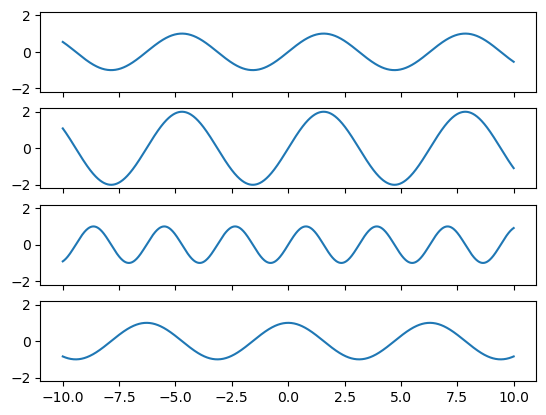

In [45]:
fig, ax = plt.subplots(4,1,sharex=True,sharey=True)

ax[0].plot(t,s1)
ax[1].plot(t,s2)
ax[2].plot(t,s3)
ax[3].plot(t,s4)

plt.show()

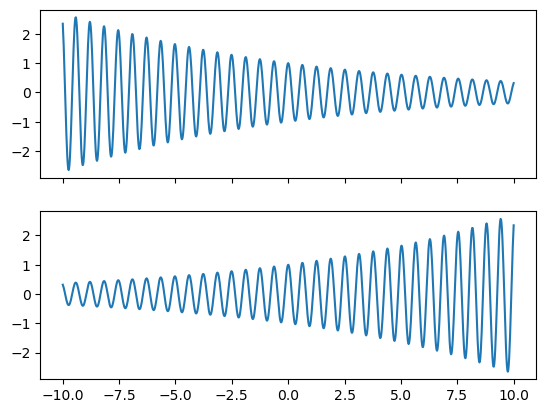

In [46]:
def exp_signal(r,A,w,phi,t):
    return A*np.exp(r*t)*np.cos(w*t + phi)

e1 = exp_signal(-0.1,1,10,0,t)
e2 = exp_signal(0.1,1,10,0,t)

fig1, ax1 = plt.subplots(2,1,sharex=True)

ax1[0].plot(t,e1)
ax1[1].plot(t,e2)

## Calculate the energy and power of a periodic signal

$E_{period}=\int_0^{T_0}|e^{j\omega_0t}|^2dt=T_0$

$P_{period}=E_{period}/T_0 = 1$

### Discrete vs. Continuous

Period: $\frac{2\pi}{N}=\frac{\omega_0}{m}$ vs.  $\frac{2\pi}{T_0}=\omega_0$

## Unit Impulse and Step Functions

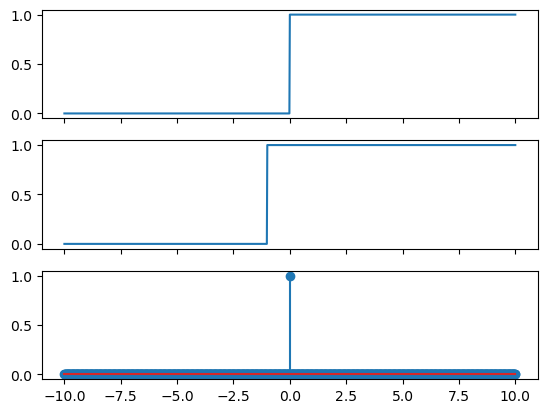

In [4]:
def step(A,B,t):
    return np.where(t<A,0,B)

def impulse(A,B,t):
    return np.where(np.isclose(t,A),B,0)

i1 = impulse(0,1,t)

h1 = np.heaviside(t,1)
h2= step(-1,1,t)


fig2, ax2 = plt.subplots(3,1,sharex=True)

ax2[0].plot(t,h1)
ax2[1].plot(t,h2)
ax2[2].stem(t,i1)

plt.show()

Note that: $u[n] = \sum_{k=0}^{\infty}\delta[n-k]$ and $\delta[n] = u[n] - u[n-1]$

Likewise: $u(t) = \int_{-\infty}^t\delta(\tau)d\tau$ and $\delta(t)=\frac{du(t)}{dt}$ and $x(t_0)=x(t)\delta(t-t_0)$

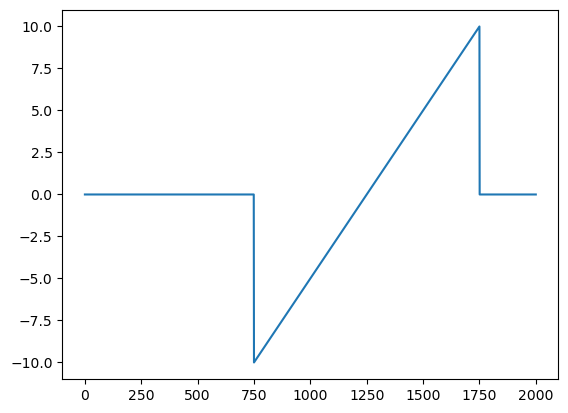

In [23]:
def x(t):
    return t

i2 = impulse(5,1,t)

product = x(t)*i2
convolution = np.convolve(x(t),i2)
t_con = np.arange(len(convolution))

#plt.plot(t,product)
plt.plot(t_con,convolution)

# Oppenheim Ch2

## Linear Time Invariant Systems

The key idea in visualizing how the discrete-time unit impulse can be used to construct any discrete-time signal is to think of a discrete-time signal as a sequence of individual impulses.

$$x[n]=\sum_{k=-\infty}^{+\infty} x[k]\delta[n-k]$$

### Convolution sum / superposition sum 

$$y[n] = \sum_{k=-\infty}^{+\infty}x[k]h[n-k] = x[n] * h[n]$$

That is, $h[n]$ is the output of the LTI system when $\delta[n]$ is the input. Convolution is symbolically represented by $y[n]=x[n]*h[n]$

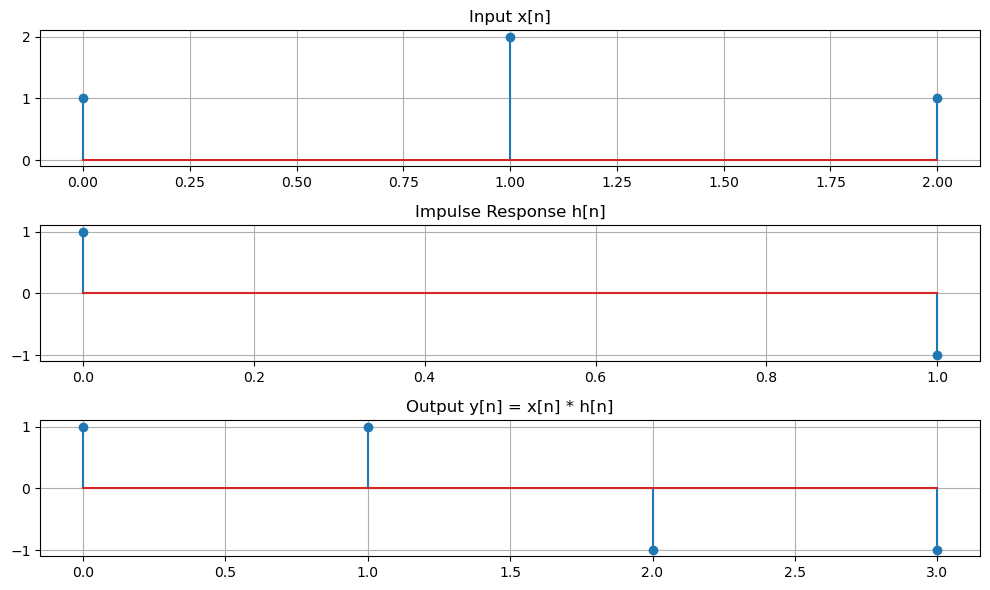

In [53]:
x = np.array([1, 2, 1])
h = np.array([1, -1])
y = np.convolve(x, h)

n_x = np.arange(len(x))
n_h = np.arange(len(h))
n_y = np.arange(len(y))

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.stem(n_x, x)
plt.title("Input x[n]")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n_h, h)
plt.title("Impulse Response h[n]")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n_y, y)
plt.title("Output y[n] = x[n] * h[n]")
plt.grid(True)

plt.tight_layout()
plt.show()

### Geometric Sum Formula

$\sum_{k=0}^n \alpha^k = \frac{1-\alpha^{n+1}}{1-\alpha}$ for $x[n]=\alpha^n$ for **finite** sums. 

For **infinite** sums, use: $\sum_{k=0}^{\infty} \alpha^k = \frac{1}{1-\alpha}$ for $0<|\alpha|<1$

In [2]:
# Define two signals (e.g., arrays)
signal_1 = np.array([1, 2, 3, 4, 5])
signal_2 = np.array([0.2, 0.5, 1])

# Method 1: Using NumPy's convolve function
convolution_result_numpy = np.convolve(signal_1, signal_2, mode='full')
# mode can be 'full', 'valid', or 'same'

# Method 2: Using SciPy's convolve function
convolution_result_scipy = signal.convolve(signal_1, signal_2, mode='full')

print("Convolution result using NumPy:", convolution_result_numpy)
print("Convolution result using SciPy:", convolution_result_scipy)

Convolution result using NumPy: [0.2 0.9 2.6 4.3 6.  6.5 5. ]
Convolution result using SciPy: [0.2 0.9 2.6 4.3 6.  6.5 5. ]


### Convolution integral for continuous time

$y(t) = \int_{-\infty}^{\infty}x(\tau)\delta(t-\tau)d\tau = x(t) * h(t)$

### Properties of LTI systems

1. Commuative
2. Distributive
3. Associative

It is important to emphasize that the behavior of LTI systems in cascade-and, in particular, the fact that the overall system response does not depend upon the order of the systems in the cascade-is very special to such systems. In contrast, the order in which nonlinear systems are cascaded cannot be changed, in general, without changing the overall response

## Causal LTI Systems described by Differential and Difference Equations

A general Nth order linear constant-coefficient differential equation is:

$$\sum_{k=0}^Na_k\frac{d^ky(t)}{dt^k} = \sum_{k=0}^Mb_k\frac{d^kx(t)}{dt^k}$$

These systems are causal and LTI. For first order equations, solve for homogeneous and particular solutions, given initial conditions, typically with $y(0)=0$.

For difference equations, typically we have:

$$\sum_{k=0}^Na_ky[n-k] = \sum_{k=0}^M b_kx[n-k]$$

known as a recursive equation.

For when $N=0$, the difference reduces to:

$$y[n] = \sum_{k=0}^N\left(\frac{b_k}{a_0}\right) x[n-k]$$

which is not recursive, is an LTI system, and is actually just the convolution sum, called the *finite impulse response (FIR) system*. It has impulse:

\begin{equation}
h[n]=
\begin{cases}
\frac{b_n}{a_0}, \quad 0 \leq n \leq M \\
0, \quad otherwise
\end{cases}
\end{equation}

## Singularity Functions

Unit ramp function: $u_{-2}(t) = tu(t)$

And more generally:

$$ u_{-k}(t) = \frac{t^{k-1}}{(k-1)!} u(t) $$

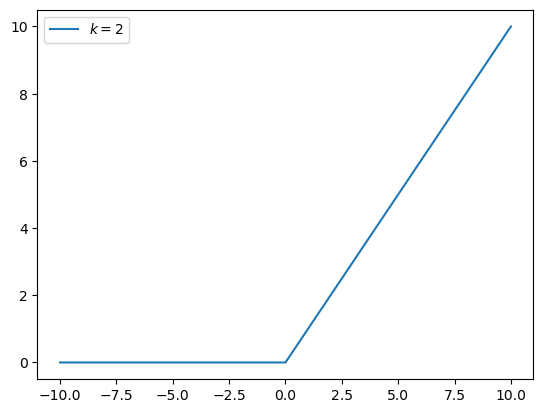

Value at t = 2: 2.0


In [21]:
# Singularity functions
k=2

def ramp(A,k,t):
    response = (t)**(k-1) / math.factorial(k-1)
    return np.where(t<A,0,response)

r1 = ramp(0,k,t)
label = fr'$k={k}$'
plt.plot(t,r1,label=label)
plt.legend()
plt.show()

t2 = ramp(0,k,2)
print(f'Value at t = 2: {t2}')